## Rotation Matrix

#### A vector can be rotated by multiplying it with a rotational matrix

In [44]:
# import essential libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

#### A Vector in 3D Space

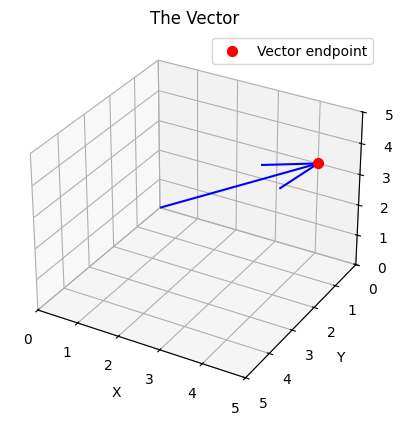

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

origin = [0, 0, 0]
vector = [4, 0, 3]
ax.quiver(origin[0], origin[1], origin[2], vector[0], vector[1], vector[2], color='blue', length=1, normalize=False)
ax.scatter(vector[0], vector[1], vector[2], color='red', s=50, label='Vector endpoint')
ax.set_xlim([0, 5])
ax.set_ylim([5, 0])
ax.set_zlim([0, 5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('The Vector')
ax.legend()
plt.show()


### Basic Rotational Matrices

A counterclockwise rotation by angle θ around the X-axis:

$$
R_{X, \theta} = 
\begin{bmatrix}
1 & 0 & 0 \\
0 & \cos\theta & -\sin\theta \\
0 & \sin\theta & \cos\theta
\end{bmatrix}
$$

A counterclockwise rotation by angle θ around the Y-axis:

$$
R_{Y, \theta} = 
\begin{bmatrix}
\cos\theta & 0 & \sin\theta \\
0 & 1 & 0 \\
-\sin\theta & 0 & \cos\theta
\end{bmatrix}
$$

A counterclockwise rotation by angle θ around the Z-axis:

$$
R_{Z, \theta} = 
\begin{bmatrix}
\cos\theta & -\sin\theta & 0 \\
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

In [46]:
theta = np.pi/2
rotation_matrix_x = np.array([[1, 0, 0],[0, np.cos(theta), -np.sin(theta)],[0, np.sin(theta), np.cos(theta)]])
rotation_matrix_y = np.array([[np.cos(theta), 0, np.sin(theta)],[0, 1, 0],[-np.sin(theta), 0, np.cos(theta)]])
rotation_matrix_z = np.array([[np.cos(theta), -np.sin(theta), 0],[np.sin(theta), np.cos(theta), 0],[0, 0, 1]])

#### Multiplication of a vector by two basic rotational matrices.
- In first graph the vector rotated around the Y axis about 90 degrees  
- In the second graph the vector rotated around the Z axis about 90 degrees

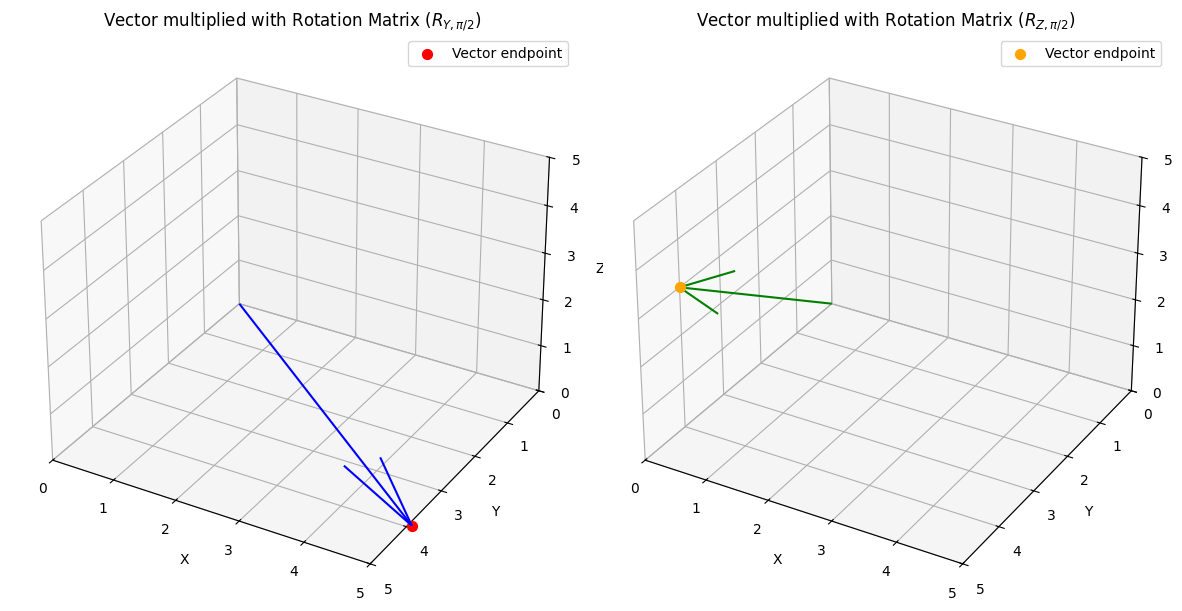

In [47]:
fig = plt.figure(figsize=(12, 6))

# Plot 1
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
origin = [0, 0, 0]
vector1 = rotation_matrix_y @ vector
ax1.quiver(origin[0], origin[1], origin[2], vector1[0], vector1[1], vector1[2], color='blue', length=1, normalize=False)
ax1.scatter(vector1[0], vector1[1], vector1[2], color='red', s=50, label='Vector endpoint')
ax1.set_xlim([0, 5])
ax1.set_ylim([5, 0])
ax1.set_zlim([0, 5])
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Vector multiplied with Rotation Matrix ($R_{Y,\\pi /2}$)')
ax1.legend()

# Plot 2
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
vector2 = rotation_matrix_z @ vector
ax2.quiver(origin[0], origin[1], origin[2], vector2[0], vector2[1], vector2[2], color='green', length=1, normalize=False)
ax2.scatter(vector2[0], vector2[1], vector2[2], color='orange', s=50, label='Vector endpoint')
ax2.set_xlim([0, 5])
ax2.set_ylim([5, 0])
ax2.set_zlim([0, 5])
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Vector multiplied with Rotation Matrix ($R_{Z,\\pi /2}$)')
ax2.legend()

plt.tight_layout()
plt.show()

## Composition Law

#### Consider a free vector,

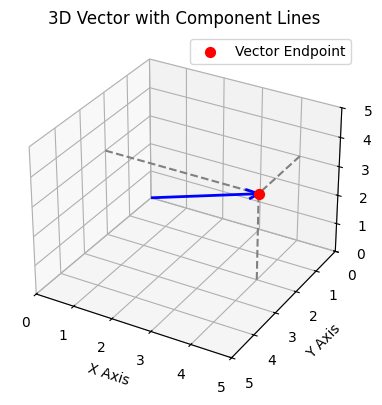

In [48]:
vector = [4, 2, 3]
x, y, z = vector

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, x, y, z, color='blue', linewidth=2, arrow_length_ratio=0.1)
ax.scatter(x, y, z, color='red', s=50, label='Vector Endpoint')
ax.plot([0, x], [y, y], [z, z], color='gray', linestyle='--')  # Parallel to X
ax.plot([x, x], [0, y], [z, z], color='gray', linestyle='--')  # Parallel to Y
ax.plot([x, x], [y, y], [0, z], color='gray', linestyle='--')  # Parallel to Z
ax.set_xlim([0, 5])
ax.set_ylim([5, 0])
ax.set_zlim([0, 5])
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector with Component Lines')
ax.legend()

plt.tight_layout()
plt.show()


#### Rotating the vector step by step using multiple rotation matrices,

$$
V_1 = R_{X, \pi /2} * V \\
V_2 = R_{Y, \pi /2} * V_1
$$

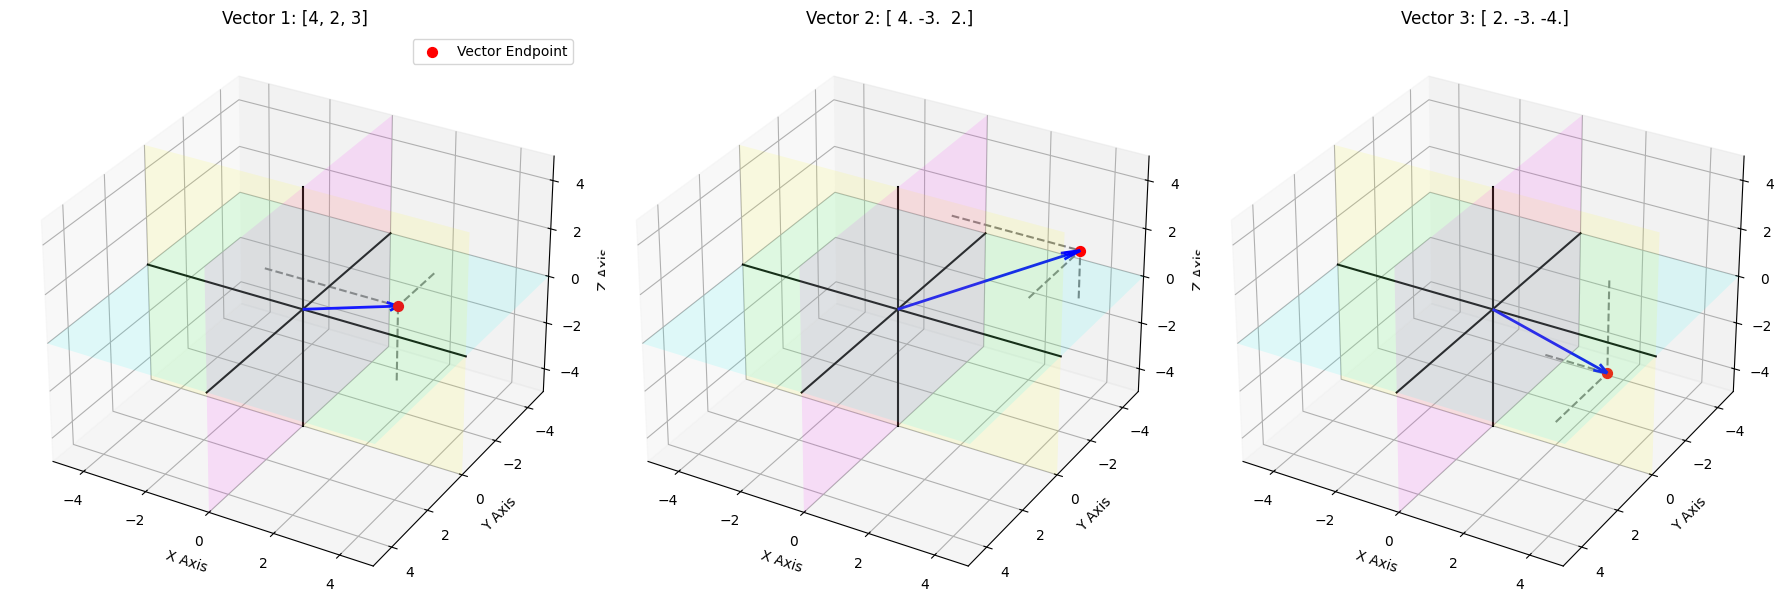

In [49]:
vector_1 = rotation_matrix_x @ vector
vector_2 = rotation_matrix_y @ vector_1
vectors = [vector, vector_1, vector_2]

fig = plt.figure(figsize=(18, 6))

for i, vector in enumerate(vectors):
    x, y, z = vector
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    ax.quiver(0, 0, 0, x, y, z, color='blue', linewidth=2, arrow_length_ratio=0.1)
    ax.scatter(x, y, z, color='red', s=50, label='Vector Endpoint')
    ax.plot([0, x], [y, y], [z, z], color='gray', linestyle='--')
    ax.plot([x, x], [0, y], [z, z], color='gray', linestyle='--')
    ax.plot([x, x], [y, y], [0, z], color='gray', linestyle='--')
    ax.plot([-5, 5], [0, 0], [0, 0], color='black', linewidth=1.5)
    ax.plot([0, 0], [-5, 5], [0, 0], color='black', linewidth=1.5)
    ax.plot([0, 0], [0, 0], [-5, 5], color='black', linewidth=1.5)
    xy_plane = [[(-5, -5, 0), (5, -5, 0), (5, 5, 0), (-5, 5, 0)]]
    yz_plane = [[(0, -5, -5), (0, 5, -5), (0, 5, 5), (0, -5, 5)]]
    xz_plane = [[(-5, 0, -5), (5, 0, -5), (5, 0, 5), (-5, 0, 5)]]
    ax.add_collection3d(Poly3DCollection(xy_plane, alpha=0.1, facecolor='cyan'))
    ax.add_collection3d(Poly3DCollection(yz_plane, alpha=0.1, facecolor='magenta'))
    ax.add_collection3d(Poly3DCollection(xz_plane, alpha=0.1, facecolor='yellow'))
    ax.set_xlim([-5, 5])
    ax.set_ylim([5, -5])
    ax.set_zlim([-5, 5])
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')
    ax.set_title(f'Vector {i+1}: {vector}')
    if i == 0:
        ax.legend()
plt.tight_layout()
plt.show()


#### Rotating the vector by using composition law,

$$
R = R_{Y, \pi /2} * R_{X, \pi /2} \\
V_2 = R * V
$$

Here, we can see that composed rotational matrix is able to rotate the vector directly

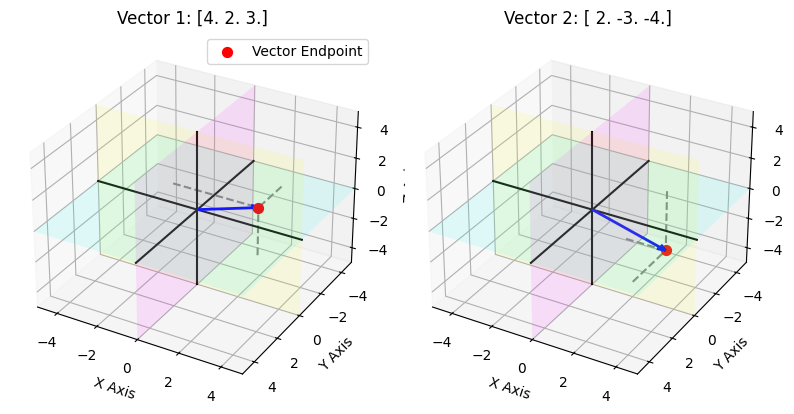

In [56]:
composed_rotation_matrix = rotation_matrix_y @ rotation_matrix_x
vector_2 = composed_rotation_matrix @ vector
vectors = [vector, vector_2]

fig = plt.figure(figsize=(12, 4))

for i, vector in enumerate(vectors):
    x, y, z = vector
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    ax.quiver(0, 0, 0, x, y, z, color='blue', linewidth=2, arrow_length_ratio=0.1)
    ax.scatter(x, y, z, color='red', s=50, label='Vector Endpoint')
    ax.plot([0, x], [y, y], [z, z], color='gray', linestyle='--')
    ax.plot([x, x], [0, y], [z, z], color='gray', linestyle='--')
    ax.plot([x, x], [y, y], [0, z], color='gray', linestyle='--')
    ax.plot([-5, 5], [0, 0], [0, 0], color='black', linewidth=1.5)
    ax.plot([0, 0], [-5, 5], [0, 0], color='black', linewidth=1.5)
    ax.plot([0, 0], [0, 0], [-5, 5], color='black', linewidth=1.5)
    xy_plane = [[(-5, -5, 0), (5, -5, 0), (5, 5, 0), (-5, 5, 0)]]
    yz_plane = [[(0, -5, -5), (0, 5, -5), (0, 5, 5), (0, -5, 5)]]
    xz_plane = [[(-5, 0, -5), (5, 0, -5), (5, 0, 5), (-5, 0, 5)]]
    ax.add_collection3d(Poly3DCollection(xy_plane, alpha=0.1, facecolor='cyan'))
    ax.add_collection3d(Poly3DCollection(yz_plane, alpha=0.1, facecolor='magenta'))
    ax.add_collection3d(Poly3DCollection(xz_plane, alpha=0.1, facecolor='yellow'))
    ax.set_xlim([-5, 5])
    ax.set_ylim([5, -5])
    ax.set_zlim([-5, 5])
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')
    ax.set_title(f'Vector {i+1}: {vector}')
    if i == 0:
        ax.legend()
plt.tight_layout()
plt.show()
